In [ ]:
import pandas as pd
df_austin = pd.read_csv("C:/Users/vanis/Downloads/reviews_Austin.csv")
df_dallas = pd.read_csv("C:/Users/vanis/Downloads/reviews_Dallas.csv")
df_fortworth = pd.read_csv("C:/Users/vanis/Downloads/reviews_FW.csv")


In [ ]:
df_austin['City'] = 'austin'
df_dallas['City'] = 'dallas'
df_fortworth['City'] = 'fw'

In [ ]:
df_austin.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        5456   865  2009-03-08         5267         Ellen   
1        5456   977  2009-03-19         8102          Phil   
2        5456  1039  2009-03-22         8241         Galen   
3        5456  1347  2009-04-08        11152         April   
4        5456  1491  2009-04-13        12400        Ivonne   

                                            comments    City  
0  Sylvia is a hostess who is gracious and helpfu...  austin  
1  Highly recommended. Sylvia was extremely helpf...  austin  
2  A great place to stay in a great city. Sylvia ...  austin  
3  Highly recommended! \r<br/>Cute and cozy guest...  austin  
4  What a great little apartment!  It was clean, ...  austin

In [ ]:
import pandas as pd

df_combined = pd.concat([df_austin, df_dallas, df_fortworth], ignore_index=True)

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893262 entries, 0 to 893261
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     893262 non-null  int64 
 1   id             893262 non-null  int64 
 2   date           893262 non-null  object
 3   reviewer_id    893262 non-null  int64 
 4   reviewer_name  893262 non-null  object
 5   comments       892984 non-null  object
 6   City           893262 non-null  object
dtypes: int64(3), object(4)
memory usage: 47.7+ MB


In [ ]:
# Group by the 'City' column and check for missing values
missing_values_city_wise = df_combined.groupby('City').apply(lambda x: x.isnull().sum())

# Display the missing values city-wise
print(missing_values_city_wise)


        listing_id  id  date  reviewer_id  reviewer_name  comments  City
City                                                                    
austin           0   0     0            0              0       169     0
dallas           0   0     0            0              0        79     0
fw               0   0     0            0              0        30     0


C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\461035452.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_city_wise = df_combined.groupby('City').apply(lambda x: x.isnull().sum())


In [ ]:
# Remove rows with null values in the original DataFrame ( 278 comments are null , which is 0.03%)
df_no_nulls = df_combined.dropna()

# Verify if null values are removed
print("Null values remaining:")
print(df_no_nulls.isnull().sum())

# If you want to verify specific columns after removal
print("Rows without null values by City:")
print(df_no_nulls.groupby('City').apply(lambda x: x.isnull().sum()))


Null values remaining:
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
City             0
dtype: int64
Rows without null values by City:
        listing_id  id  date  reviewer_id  reviewer_name  comments  City
City                                                                    
austin           0   0     0            0              0         0     0
dallas           0   0     0            0              0         0     0
fw               0   0     0            0              0         0     0


C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\3813455434.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df_no_nulls.groupby('City').apply(lambda x: x.isnull().sum()))


In [ ]:
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892984 entries, 0 to 893261
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     892984 non-null  int64 
 1   id             892984 non-null  int64 
 2   date           892984 non-null  object
 3   reviewer_id    892984 non-null  int64 
 4   reviewer_name  892984 non-null  object
 5   comments       892984 non-null  object
 6   City           892984 non-null  object
dtypes: int64(3), object(4)
memory usage: 54.5+ MB


In [ ]:
#pip install nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Define custom stopwords list
custom_stopwords = set(stopwords.words('english'))  # Load default nltk stopwords
custom_stopwords.update([' u ','u', 'would', 'like', 'could', 'get','need',
                         'also','br','austin','u','really','stay','dallas',
                         'one','little','lot','even','also','bed','felt'
                          ])  # Add custom words to remove

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = text.lower()  # Lowercasing
        text = re.sub(r'\W', ' ', text)  # Remove special characters
        tokens = text.split()  # Tokenization
        # Lemmatization & custom stopword removal
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords]
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string if the input is not a valid string (e.g., NaN)

# Apply the function to the dataframe
df_no_nulls['cleaned_comments'] = df_no_nulls['comments'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\2311632407.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls['cleaned_comments'] = df_no_nulls['comments'].apply(preprocess_text)


Before analyzing, we need to clean and preprocess the text. This includes:

**Lowercasing:** Ensure consistency by converting all text to lowercase.


**Remove Punctuation and Special Characters:** Clean out unnecessary characters.


**Tokenization:** Split comments into individual words (tokens).


**Stopwords Removal:** Remove common words (e.g., "the", "and") that don’t add much meaning.


**Stemming or Lemmatization:** Reduce words to their base or root forms.

In [ ]:
df_no_nulls['cleaned_comments'].head()

0    sylvia hostess gracious helpful beyond word fi...
1    highly recommended sylvia extremely helpful fr...
2    great place great city sylvia picked airport d...
3    highly recommended cute cozy guest house thank...
4    great apartment clean good location everything...
Name: cleaned_comments, dtype: object

In [ ]:
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892984 entries, 0 to 893261
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   listing_id        892984 non-null  int64 
 1   id                892984 non-null  int64 
 2   date              892984 non-null  object
 3   reviewer_id       892984 non-null  int64 
 4   reviewer_name     892984 non-null  object
 5   comments          892984 non-null  object
 6   City              892984 non-null  object
 7   cleaned_comments  892984 non-null  object
dtypes: int64(3), object(5)
memory usage: 61.3+ MB


# Univariate Analysis

**Word Frequency:** Find the most common words or phrases in the comments.

**Word Clouds:** Visualize common words with a word cloud to quickly spot dominant words.

In [ ]:
from collections import Counter

word_counts = Counter(" ".join(df_no_nulls['cleaned_comments']).split())
common_words = word_counts.most_common(50)


In [ ]:
common_words ###words like austin, host,stay,would,br,home make no sense

[('great', 550009),
 ('place', 466008),
 ('location', 268595),
 ('clean', 237018),
 ('host', 221696),
 ('house', 182325),
 ('home', 160338),
 ('everything', 159555),
 ('nice', 152749),
 ('perfect', 147566),
 ('comfortable', 145494),
 ('definitely', 142591),
 ('recommend', 141327),
 ('space', 115311),
 ('easy', 109933),
 ('close', 108364),
 ('time', 103433),
 ('u', 102277),
 ('super', 101529),
 ('well', 100621),
 ('loved', 89522),
 ('beautiful', 87634),
 ('area', 86431),
 ('neighborhood', 85648),
 ('downtown', 84857),
 ('quiet', 83395),
 ('amazing', 83052),
 ('back', 79115),
 ('responsive', 78102),
 ('needed', 78020),
 ('good', 75626),
 ('check', 74245),
 ('highly', 70919),
 ('room', 69215),
 ('restaurant', 66990),
 ('enjoyed', 66540),
 ('wonderful', 63287),
 ('staying', 63194),
 ('airbnb', 58617),
 ('spot', 57940),
 ('apartment', 56296),
 ('cozy', 52495),
 ('helpful', 50851),
 ('cute', 50562),
 ('night', 49216),
 ('made', 48534),
 ('quick', 48039),
 ('stayed', 47570),
 ('kitchen', 4672

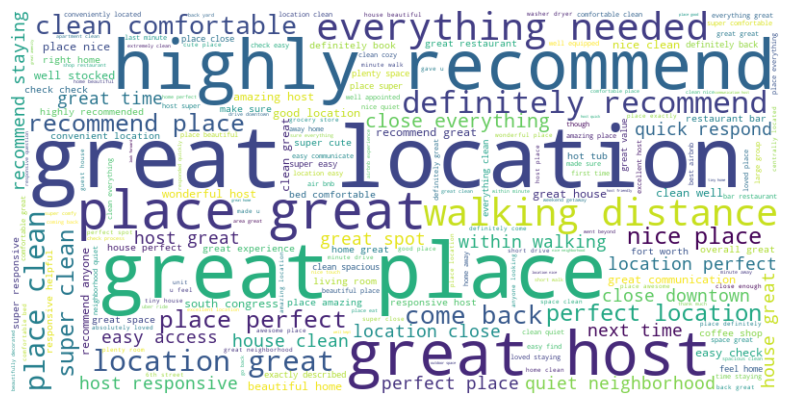

In [ ]:
#pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_no_nulls['cleaned_comments']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Most of them are postivite reviews , meaning negatives are very few?

# Polarity/Sentiment

In [ ]:
#pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate polarity and compound score
def vader_sentiment(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        polarity = scores['compound']  # Compound score combines overall sentiment (-1 to 1)
        return polarity
    else:
        return 0  # Handle NaN or non-string inputs

# Apply VADER sentiment analysis to comments
df_no_nulls['polarity'] = df_no_nulls['comments'].apply(vader_sentiment)

# Classify sentiment based on VADER compound polarity score
df_no_nulls['sentiment'] = np.select(
    [df_no_nulls['polarity'] > 0.05, df_no_nulls['polarity'] < -0.05, df_no_nulls['polarity'].between(-0.05, 0.05)],
    ['positive', 'negative', 'neutral']
)

# Display the sentiment classification
df_no_nulls[['comments', 'polarity', 'sentiment']].head()


C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\3628624425.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls['polarity'] = df_no_nulls['comments'].apply(vader_sentiment)
C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\3628624425.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls['sentiment'] = np.select(


comments  polarity sentiment
0  Sylvia is a hostess who is gracious and helpfu...    0.9589  positive
1  Highly recommended. Sylvia was extremely helpf...    0.8432  positive
2  A great place to stay in a great city. Sylvia ...    0.9705  positive
3  Highly recommended! \r<br/>Cute and cozy guest...    0.5042  positive
4  What a great little apartment!  It was clean, ...    0.9787  positive

In [ ]:
# Count the occurrences of each sentiment category
sentiment_counts = df_no_nulls['sentiment'].value_counts()

# Calculate total number of sentiments
total_sentiments = sentiment_counts.sum()

# Calculate percentages
sentiment_percentages = (sentiment_counts / total_sentiments) * 100

# Display counts and percentages
print("Sentiment Counts and Percentages:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"{sentiment.capitalize()}: {count} ({percentage:.2f}%)")

# Access specific values if needed
positive_count = sentiment_counts.get('positive', 0)
positive_percentage = sentiment_percentages.get('positive', 0)

negative_count = sentiment_counts.get('negative', 0)
negative_percentage = sentiment_percentages.get('negative', 0)

neutral_count = sentiment_counts.get('neutral', 0)
neutral_percentage = sentiment_percentages.get('neutral', 0)

print(f"\nPositive Sentiments: {positive_count} ({positive_percentage:.2f}%)")
print(f"Negative Sentiments: {negative_count} ({negative_percentage:.2f}%)")
print(f"Neutral Sentiments: {neutral_count} ({neutral_percentage:.2f}%)")


Sentiment Counts and Percentages:
Positive: 861588 (96.48%)
Neutral: 19634 (2.20%)
Negative: 11762 (1.32%)

Positive Sentiments: 861588 (96.48%)
Negative Sentiments: 11762 (1.32%)
Neutral Sentiments: 19634 (2.20%)


# N-Gram analysis

In [ ]:
# import nltk
nltk.download('punkt')  # Download the Punkt tokenizer models


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Filter the DataFrame for 'City == austin'
austin_data = df_no_nulls[df_no_nulls['City'] == 'austin']

In [ ]:
# Filter the DataFrame for 'City == austin'
dallas_data = df_no_nulls[df_no_nulls['City'] == 'dallas']

In [ ]:
# Filter the DataFrame for 'City == austin'
dallas_data = df_no_nulls[df_no_nulls['City'] == 'fortworth']

# AUSTIN

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Filter the DataFrame for 'City == austin'
austin_data = df_no_nulls[df_no_nulls['City'] == 'austin']

# Generate n-grams for the 'cleaned_comments' column
n = 2  # Set n for bigrams, change to 3 for trigrams, etc.
austin_data['ngrams'] = austin_data['cleaned_comments'].apply(
    lambda x: list(ngrams(x.lower().split(), n)) if isinstance(x, str) else [])


# Display the n-grams for the first few rows
print(austin_data[['cleaned_comments', 'ngrams']].head())


                                    cleaned_comments  \
0  sylvia hostess gracious helpful beyond word fi...   
1  highly recommended sylvia extremely helpful fr...   
2  great place great city sylvia picked airport d...   
3  highly recommended cute cozy guest house thank...   
4  great apartment clean good location everything...   

                                              ngrams  
0  [(sylvia, hostess), (hostess, gracious), (grac...  
1  [(highly, recommended), (recommended, sylvia),...  
2  [(great, place), (place, great), (great, city)...  
3  [(highly, recommended), (recommended, cute), (...  
4  [(great, apartment), (apartment, clean), (clea...  


C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\1780866300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austin_data['ngrams'] = austin_data['cleaned_comments'].apply(


In [ ]:
from collections import Counter

# Flatten the list of n-grams in 'ngrams' column
all_ngrams = [ngram for ngrams_list in austin_data['ngrams'] for ngram in ngrams_list]

# Count the frequency of each n-gram
ngram_counts = Counter(all_ngrams)

# Get the top 1000 most common n-grams
top_1000_ngrams = ngram_counts.most_common(1000)

# Display the top 100 n-grams
print("Top 1000 N-Grams:")
for ngram, count in top_1000_ngrams:
    print(f"{ngram}: {count}")


Top 1000 N-Grams:
('great', 'location'): 68316
('great', 'place'): 51273
('highly', 'recommend'): 43362
('great', 'host'): 32037
('everything', 'needed'): 25276
('walking', 'distance'): 24353
('place', 'great'): 24166
('definitely', 'recommend'): 22036
('place', 'clean'): 17053
('location', 'great'): 16981
('clean', 'comfortable'): 15725
('come', 'back'): 15010
('place', 'perfect'): 13502
('perfect', 'location'): 12466
('quiet', 'neighborhood'): 11830
('close', 'downtown'): 11827
('close', 'everything'): 11741
('super', 'clean'): 11566
('recommend', 'place'): 11539
('location', 'perfect'): 11059
('great', 'time'): 10771
('south', 'congress'): 10749
('next', 'time'): 10385
('recommend', 'staying'): 10338
('nice', 'place'): 10195
('great', 'spot'): 10143
('easy', 'access'): 9822
('host', 'responsive'): 9800
('quick', 'respond'): 9687
('within', 'walking'): 9522
('location', 'close'): 9377
('perfect', 'place'): 8850
('house', 'clean'): 8644
('house', 'great'): 8388
('good', 'location'): 8

# Trigram Analysis for Austin

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Filter the DataFrame for 'City == austin'
austin_data = df_no_nulls[df_no_nulls['City'] == 'austin']

# Generate n-grams for the 'cleaned_comments' column
n = 3  # Set n for bigrams, change to 3 for trigrams, etc.
austin_data['ngrams'] = austin_data['cleaned_comments'].apply(
    lambda x: list(ngrams(x.lower().split(), n)) if isinstance(x, str) else [])


# Display the n-grams for the first few rows
print(austin_data[['cleaned_comments', 'ngrams']].head())


                                    cleaned_comments  \
0  sylvia hostess gracious helpful beyond word fi...   
1  highly recommended sylvia extremely helpful fr...   
2  great place great city sylvia picked airport d...   
3  highly recommended cute cozy guest house thank...   
4  great apartment clean good location everything...   

                                              ngrams  
0  [(sylvia, hostess, gracious), (hostess, gracio...  
1  [(highly, recommended, sylvia), (recommended, ...  
2  [(great, place, great), (place, great, city), ...  
3  [(highly, recommended, cute), (recommended, cu...  
4  [(great, apartment, clean), (apartment, clean,...  


C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\3808329606.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austin_data['ngrams'] = austin_data['cleaned_comments'].apply(


In [ ]:
from collections import Counter

# Flatten the list of n-grams in 'ngrams' column
all_ngrams = [ngram for ngrams_list in austin_data['ngrams'] for ngram in ngrams_list]

# Count the frequency of each n-gram
ngram_counts = Counter(all_ngrams)

# Get the top 1000 most common n-grams
top_1000_ngrams = ngram_counts.most_common(1000)

# Display the top 1000 n-grams
print("Top 1000 N-Grams:")
for ngram, count in top_1000_ngrams:
    print(f"{ngram}: {count}")


Top 1000 N-Grams:
('within', 'walking', 'distance'): 9295
('place', 'great', 'location'): 7022
('highly', 'recommend', 'staying'): 4928
('great', 'place', 'great'): 3991
('highly', 'recommend', 'place'): 3880
('definitely', 'come', 'back'): 3863
('home', 'away', 'home'): 3792
('great', 'location', 'close'): 3536
('great', 'location', 'great'): 3497
('made', 'u', 'feel'): 3439
('definitely', 'recommend', 'staying'): 2792
('definitely', 'recommend', 'place'): 2659
('quick', 'respond', 'question'): 2648
('house', 'great', 'location'): 2588
('clean', 'great', 'location'): 2583
('great', 'location', 'clean'): 2546
('10', '10', 'recommend'): 2462
('great', 'location', 'easy'): 2437
('recommend', 'place', 'anyone'): 2432
('clean', 'everything', 'needed'): 2269
('great', 'place', 'clean'): 2141
('feel', 'right', 'home'): 2016
('location', 'walking', 'distance'): 1935
('place', 'clean', 'comfortable'): 1874
('place', 'super', 'clean'): 1866
('sure', 'everything', 'needed'): 1839
('location', 'c

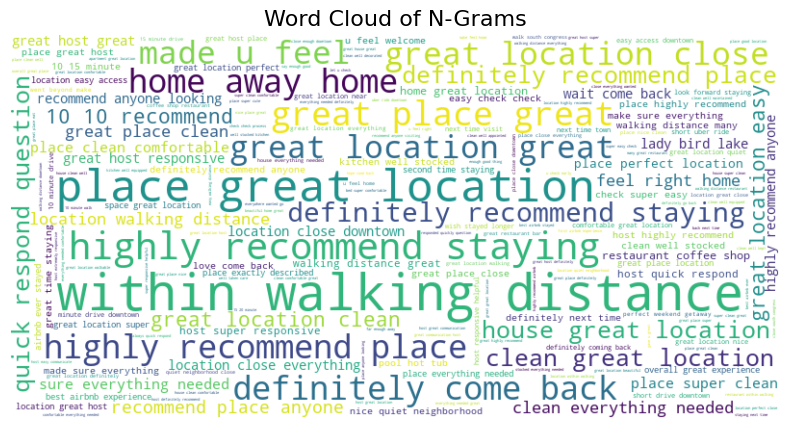

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of n-grams in 'ngrams' column
all_ngrams = [ngram for ngrams_list in austin_data['ngrams'] for ngram in ngrams_list]

# Count the frequency of each n-gram
ngram_counts = Counter(all_ngrams)

# Prepare the data for the word cloud
ngram_freq = {" ".join(ngram): freq for ngram, freq in ngram_counts.items()}  # Convert tuple to string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title("Word Cloud of N-Grams", fontsize=16)
plt.show()


In [ ]:
# Define topics with representative keywords
topics_keywords = {
    'Responsive Host': ['responsive', 'quick', 'helpful', 'communicate','host','responds','welcoming','hospitable'
                        'hospitality','help','helped','communication','support','helpful','gracious'
                        'welcomed','care','caring host','responsible','easy check in',
                        'easy check-in','easy checkin','amazing host'
                        'accomodating','available','thoughtful','easy contact',
                        'felt at home','feels like home','friendly host','host','lovely host'
                        'great host','lovely host','wonderful host','accomodating'],

    'Convenient Location': ['walking', 'distance', 'near', 'close','convenient','location',
                            'walkable','city','neighborhood','view','centrally','downtown','nice location','convenient'],

    'Great & Clean Stay': ['clean house','clean place','clean accomodation','clean airbnb','clean property','great place',
                           'cozy','fun','cute','amazing place','amazing house','amazing apartment',
                           'fantastic stay', 'fantastic home', 'fantastic house','fantastic apartment','awesome apartment'
                           'awesome place','good place','adorable place', 'adorable stay','awesome stay','perfect stay',
                           'wonderful stay','nice stay','super stay','wonderful house','clean stay','lovely stay',
                           'love this place','comfy','best stay','excellent stay','good stay', 'nice home','nice apartment',
                           'nice airbnb','awesome airbnb','love airbnb','excellent airbnb','awesome property'
                           ,'excellent property','very nice property','wonderful property','amazing property'
                           'comfortable', 'spotless', 'hygienic','neat','pleasant','nice space'
                           'beautiful','awesome stay','good stay','beautiful stay','great space'],

    'Safe Stay': ['safe', 'quiet', 'neighborhood', 'secure','calm','peaceful'],



    'Highly Recommended': ['recommended', 'definitely', 'suggest','for sure','highly recommended'
                           'second time','must visit','come back','visit again','again','satisfied',
                           'highly recommend','coming back','coming back'],

    'Family/Group/Event Friendly': ['family', 'kids', 'children', 'group','large',
                                    'gathering','spacious','party','bachelorette',
                                   'perfect party', 'weekend', 'getaway', 'event'],

    'Amazing Amenities': ['pool', 'kitchen', 'stocked', 'amenities','cafe','internet','netflix','garden'
                          'fridge','gym','tv','hair dryer','oven','work space','coffee','furnished','essentials'
                          'room','bathroom','hot tub','wifi','snacks','bakery'],


    'Pet Friendly': ['dog', 'cat','pet', 'pet friendly', 'animals','pets','animal friendly','cats','dogs','pets']
}

# Function to tag comments based on keywords
def tag_comment_with_keywords(comment, topics_keywords):
    if not isinstance(comment, str):  # Handle non-string cases
        return ["Untagged"]  # Explicitly mark as "Untagged"
    matched_topics = []
    for topic, keywords in topics_keywords.items():
        if any(keyword in comment.lower() for keyword in keywords):  # Match keywords in comment
            matched_topics.append(topic)
    return matched_topics if matched_topics else ["Untagged"]  # Add "Untagged" if no topics matched


# Apply the function to tag comments
austin_data['topics'] = austin_data['cleaned_comments'].apply(
    lambda x: tag_comment_with_keywords(x, topics_keywords)
)

# Display tagged comments
print(austin_data[['cleaned_comments', 'topics']].head())


                                    cleaned_comments  \
0  sylvia hostess gracious helpful beyond word fi...   
1  highly recommended sylvia extremely helpful fr...   
2  great place great city sylvia picked airport d...   
3  highly recommended cute cozy guest house thank...   
4  great apartment clean good location everything...   

                                              topics  
0  [Responsive Host, Convenient Location, Great &...  
1   [Responsive Host, Safe Stay, Highly Recommended]  
2          [Convenient Location, Great & Clean Stay]  
3           [Great & Clean Stay, Highly Recommended]  
4  [Convenient Location, Amazing Amenities, Pet F...  


Topic Volume:
                         Topic   Count
1          Convenient Location  339928
6                 Pet Friendly  262688
0              Responsive Host  260114
2           Great & Clean Stay  186480
4           Highly Recommended  158336
3                    Safe Stay  117900
7  Family/Group/Event Friendly  114165
5            Amazing Amenities  112665
8                     Untagged   72095


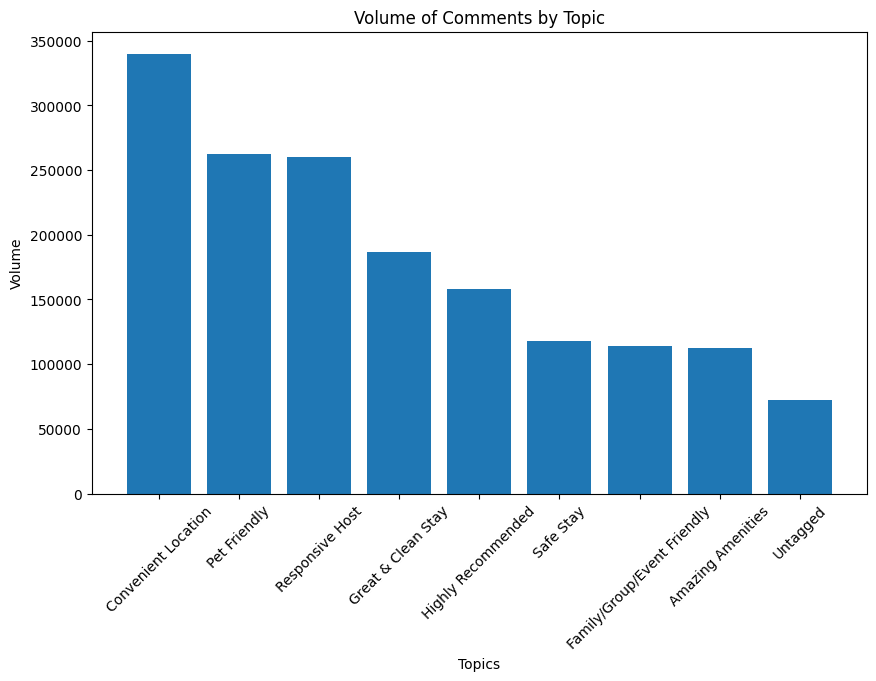

In [ ]:
from collections import Counter

# Flatten the list of topics for all comments into a single list
all_topics = [topic for topics_list in austin_data['topics'] for topic in topics_list]

# Count the occurrences of each topic
topic_counts = Counter(all_topics)

# Convert to a DataFrame for easier visualization (optional)
import pandas as pd
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Count']).sort_values(by='Count', ascending=False)

# Display the results
print("Topic Volume:")
print(topic_counts_df)

# Optionally, visualize the results as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topic_counts_df['Topic'], topic_counts_df['Count'])
plt.xlabel('Topics')
plt.ylabel('Volume')
plt.title('Volume of Comments by Topic')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### 4% untagged data

In [ ]:
austin_data.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        5456   865  2009-03-08         5267         Ellen   
1        5456   977  2009-03-19         8102          Phil   
2        5456  1039  2009-03-22         8241         Galen   
3        5456  1347  2009-04-08        11152         April   
4        5456  1491  2009-04-13        12400        Ivonne   

                                            comments    City  \
0  Sylvia is a hostess who is gracious and helpfu...  austin   
1  Highly recommended. Sylvia was extremely helpf...  austin   
2  A great place to stay in a great city. Sylvia ...  austin   
3  Highly recommended! \r<br/>Cute and cozy guest...  austin   
4  What a great little apartment!  It was clean, ...  austin   

                                    cleaned_comments  polarity sentiment  \
0  sylvia hostess gracious helpful beyond word fi...    0.9589  positive   
1  highly recommended sylvia extremely helpful fr...    0.8432  positive   
2  great place great city sylvia picked airport d...    0.9705  positive   
3  highly recommended cute cozy guest house thank...    0.5042  positive   
4  great apartment clean good location everything...    0.9787  positive   

                                              ngrams associated_ngrams  \
0  [(sylvia, hostess, gracious), (hostess, gracio...                []   
1  [(highly, recommended, sylvia), (recommended, ...                []   
2  [(great, place, great), (place, great, city), ...                []   
3  [(highly, recommended, cute), (recommended, cu...                []   
4  [(great, apartment, clean), (apartment, clean,...                []   

   contains_ngram                                             topics  price_x  \
0               0  [Responsive Host, Convenient Location, Great &...    108.0   
1               0   [Responsive Host, Safe Stay, Highly Recommended]    108.0   
2               0          [Convenient Location, Great & Clean Stay]    108.0   
3               0           [Great & Clean Stay, Highly Recommended]    108.0   
4               0  [Convenient Location, Amazing Amenities, Pet F...    108.0   

   review_scores_rating_x                topic  price_y  \
0                    4.85      Responsive Host    108.0   
1                    4.85      Responsive Host    108.0   
2                    4.85  Convenient Location    108.0   
3                    4.85   Great & Clean Stay    108.0   
4                    4.85  Convenient Location    108.0   

   review_scores_rating_y  
0                    4.85  
1                    4.85  
2                    4.85  
3                    4.85  
4                    4.85

In [ ]:
austin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617261 entries, 0 to 617260
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_id              617261 non-null  int64  
 1   id                      617261 non-null  int64  
 2   date                    617261 non-null  object 
 3   reviewer_id             617261 non-null  int64  
 4   reviewer_name           617261 non-null  object 
 5   comments                617261 non-null  object 
 6   City                    617261 non-null  object 
 7   cleaned_comments        617261 non-null  object 
 8   polarity                617261 non-null  float64
 9   sentiment               617261 non-null  object 
 10  ngrams                  617261 non-null  object 
 11  associated_ngrams       617261 non-null  object 
 12  contains_ngram          617261 non-null  int64  
 13  topics                  617261 non-null  object 
 14  price_x             

In [ ]:
# Function to assign a single topic based on priority
def assign_single_topic(comment, topics_keywords):
    if not isinstance(comment, str):  # Handle non-string cases
        return 'Uncategorized'
    for topic, keywords in topics_keywords.items():
        if any(keyword in comment.lower() for keyword in keywords):
            return topic  # Assign the first matching topic based on priority
    return 'Uncategorized'

# Apply the function to classify each comment
austin_data['topic'] = austin_data['comments'].apply(lambda x: assign_single_topic(x, topics_keywords))

# Display a few results
print(austin_data[['comments', 'topic']].head())


                                            comments                topic
0  Sylvia is a hostess who is gracious and helpfu...      Responsive Host
1  Highly recommended. Sylvia was extremely helpf...      Responsive Host
2  A great place to stay in a great city. Sylvia ...  Convenient Location
3  Highly recommended! \r<br/>Cute and cozy guest...   Great & Clean Stay
4  What a great little apartment!  It was clean, ...  Convenient Location


Topic Volume:
                         Topic   Count
1          Convenient Location  339928
6                 Pet Friendly  262688
0              Responsive Host  259933
2           Great & Clean Stay  228706
4           Highly Recommended  158336
3                    Safe Stay  117900
7  Family/Group/Event Friendly  114165
5            Amazing Amenities  112665


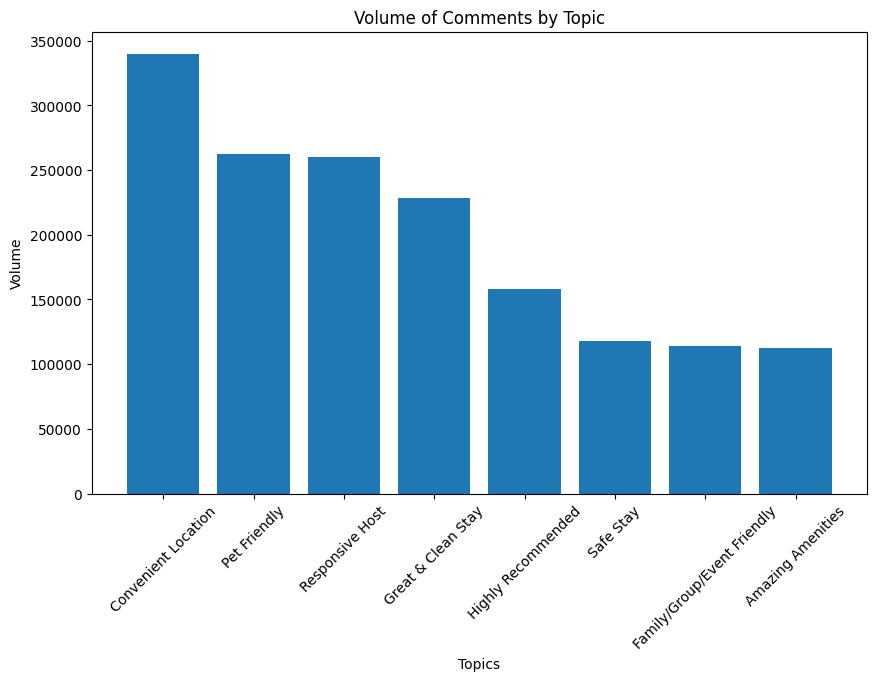

In [ ]:
from collections import Counter

# Flatten the list of topics for all comments into a single list
all_topics = [topic for topics_list in austin_data['topics'] for topic in topics_list]

# Count the occurrences of each topic
topic_counts = Counter(all_topics)

# Convert to a DataFrame for easier visualization (optional)
import pandas as pd
topic_counts_df = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Count']).sort_values(by='Count', ascending=False)

# Display the results
print("Topic Volume:")
print(topic_counts_df)

# Optionally, visualize the results as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topic_counts_df['Topic'], topic_counts_df['Count'])
plt.xlabel('Topics')
plt.ylabel('Volume')
plt.title('Volume of Comments by Topic')
plt.xticks(rotation=45)
plt.show()


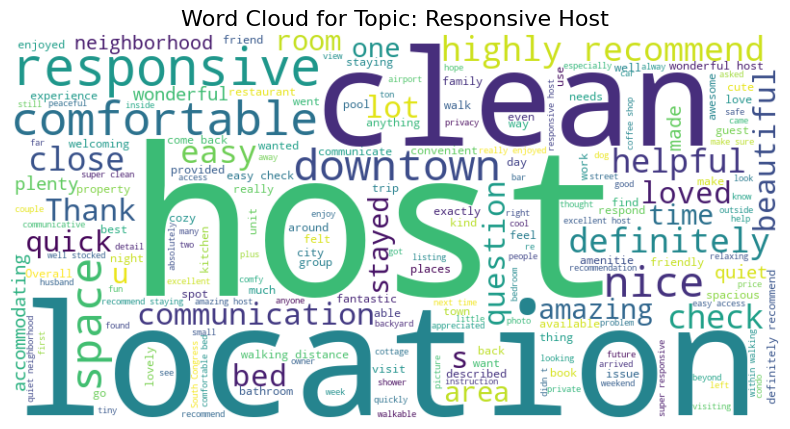

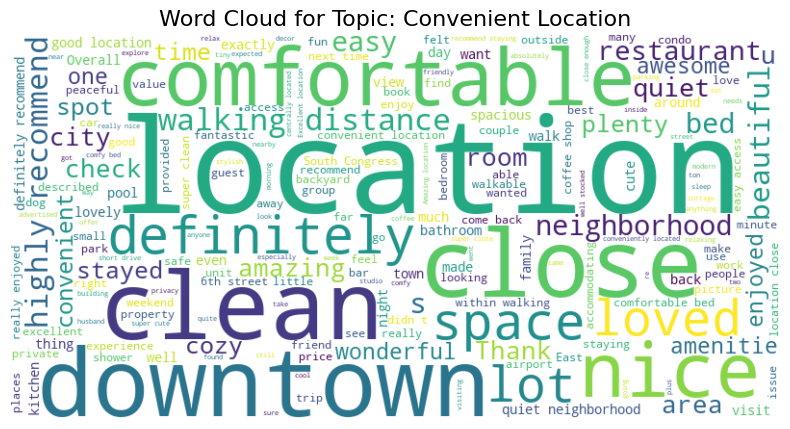

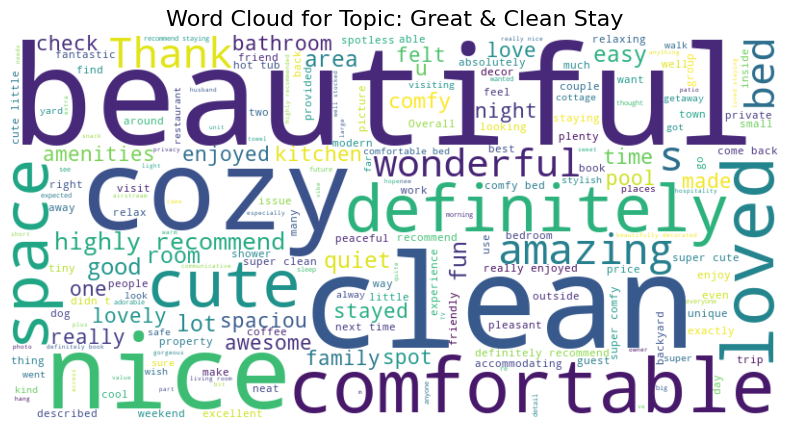

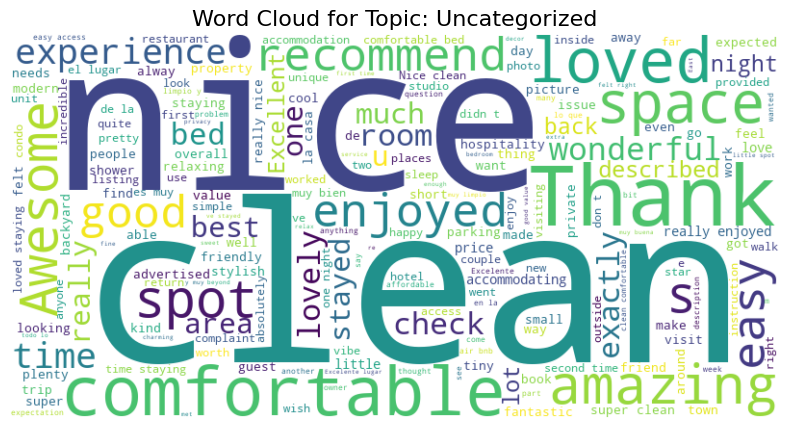

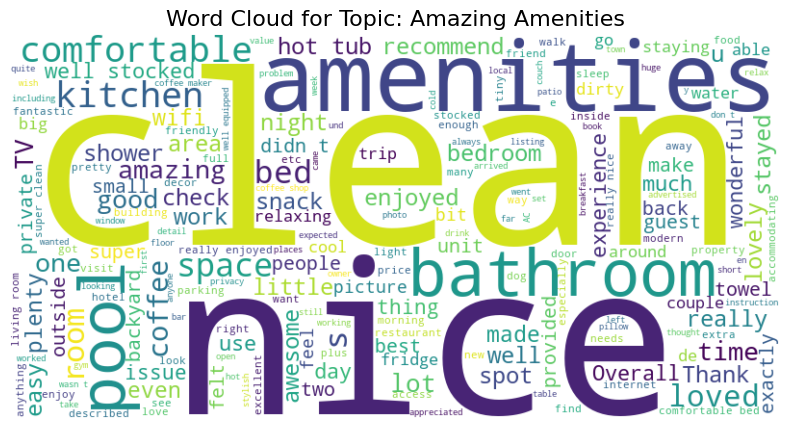

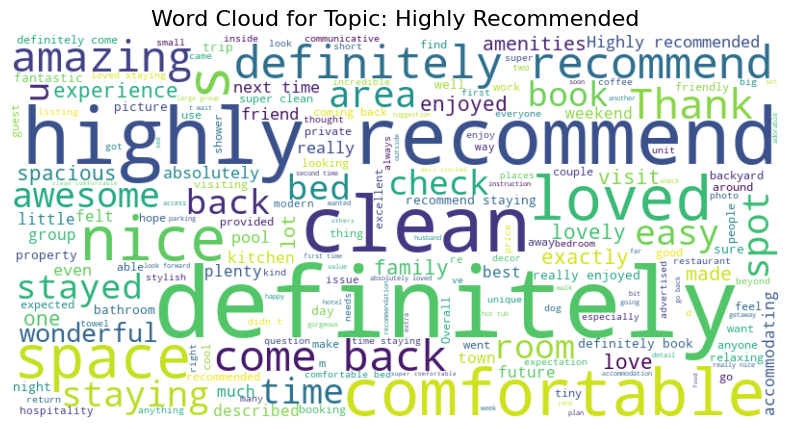

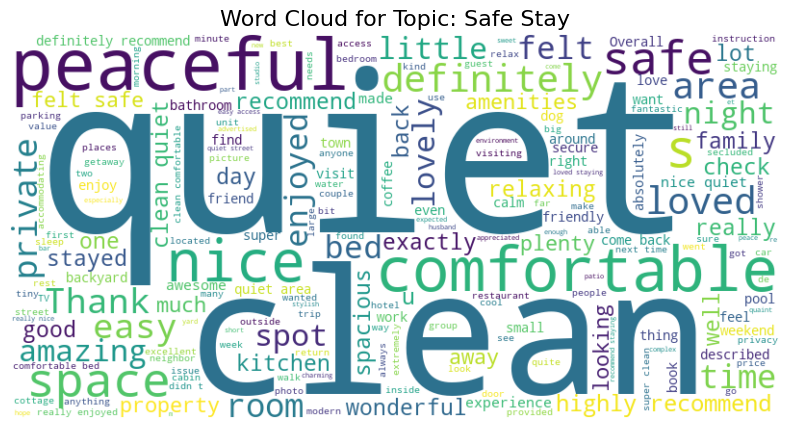

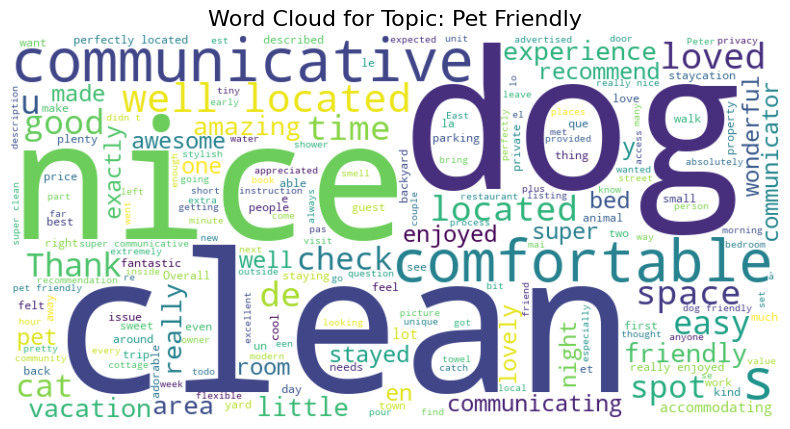

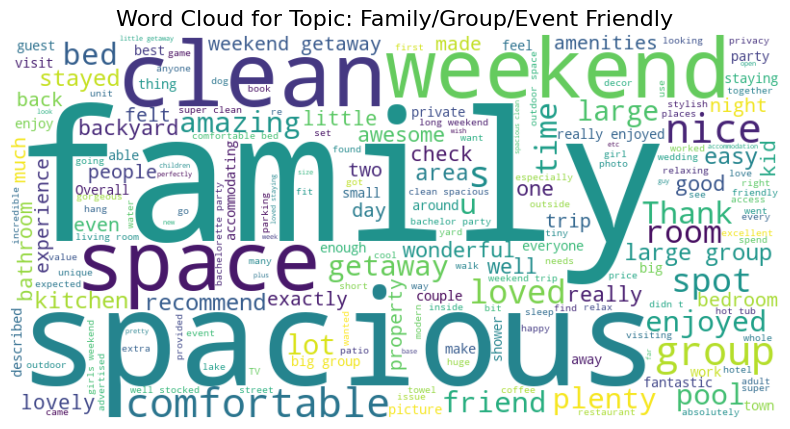

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define custom stopwords
custom_stopwords = set(STOPWORDS).union({'place', 'stay', 'great', 'austin','br',
                                         'everything','airbnb','house','home',
                                         'perfect','will','better','need','needed','apartment'})

# Function to generate a word cloud for a specific topic
def generate_word_cloud(data, topic, column='comments'):
    # Filter comments for the specific topic
    topic_comments = ' '.join(data[data['topic'] == topic][column].dropna())

    # Create a word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,  # Use the custom stopwords
        colormap='viridis'
    ).generate(topic_comments)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic: {topic}', fontsize=16)
    plt.show()

# Generate word clouds for all topics
for topic in austin_data['topic'].unique():
    generate_word_cloud(austin_data, topic)


In [ ]:
# Save the DataFrame to a CSV file
#file_path = 'austin_data.csv'  # Specify the desired file name
#austin_data.to_csv(file_path, index=False)
#print(f"Data saved to {file_path}")


In [ ]:
#Loading Price dataset
import pandas as pd

# Provide the path to your data_final CSV file
data_final_path = "C:/Users/vanis/Downloads/Data_Final.csv"

# Load the dataset into a pandas DataFrame
Listings= pd.read_csv(data_final_path)

Listings.head()


C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\4006966438.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Listings= pd.read_csv(data_final_path)


id  description  host_id                     host_since  \
0   5456            1     8028  2009-02-16 00:00:00.000000000   
1   5769            0     8186  2009-02-19 00:00:00.000000000   
2   6448            1    14156  2009-04-20 00:00:00.000000000   
3   8502            0    25298  2009-07-11 00:00:00.000000000   
4  13035            1    50793  2009-11-02 00:00:00.000000000   

   host_response_time  host_response_rate  host_acceptance_rate  \
0                   1                   1                 100.0   
1                   1                   1                  86.0   
2                   1                   1                 100.0   
3                   3                   1                  38.0   
4                   1                   1                  91.0   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  ...  \
0                  1                        2.0                     1  ...   
1                  1                        4.0                     1  ...   
2                  1                        2.0                     1  ...   
3                  0                        1.0                     1  ...   
4                  1                        2.0                     1  ...   

   pool beachfront  patio  luggage furniture host_duration_days  \
0     0          0      1        1         0               5751   
1     0          0      1        0         1               5748   
2     0          0      1        1         1               5688   
3     0          0      0        0         0               5606   
4     0          0      1        0         1               5492   

   availability_30_ratio  availability_60_ratio  availability_90_ratio  \
0              63.333333              73.333333              78.888889   
1               3.333333               1.666667               1.111111   
2              60.000000              70.000000              72.222222   
3               0.000000              10.000000              40.000000   
4               0.000000               0.000000              17.777778   

   amenities_count  
0               31  
1               38  
2               61  
3                1  
4               55  

[5 rows x 67 columns]

In [ ]:
austin_data.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        5456   865  2009-03-08         5267         Ellen   
1        5456   977  2009-03-19         8102          Phil   
2        5456  1039  2009-03-22         8241         Galen   
3        5456  1347  2009-04-08        11152         April   
4        5456  1491  2009-04-13        12400        Ivonne   

                                            comments    City  \
0  Sylvia is a hostess who is gracious and helpfu...  austin   
1  Highly recommended. Sylvia was extremely helpf...  austin   
2  A great place to stay in a great city. Sylvia ...  austin   
3  Highly recommended! \r<br/>Cute and cozy guest...  austin   
4  What a great little apartment!  It was clean, ...  austin   

                                    cleaned_comments  polarity sentiment  \
0  sylvia hostess gracious helpful beyond word fi...    0.9589  positive   
1  highly recommended sylvia extremely helpful fr...    0.8432  positive   
2  great place great city sylvia picked airport d...    0.9705  positive   
3  highly recommended cute cozy guest house thank...    0.5042  positive   
4  great apartment clean good location everything...    0.9787  positive   

                                              ngrams associated_ngrams  \
0  [(sylvia, hostess, gracious), (hostess, gracio...                []   
1  [(highly, recommended, sylvia), (recommended, ...                []   
2  [(great, place, great), (place, great, city), ...                []   
3  [(highly, recommended, cute), (recommended, cu...                []   
4  [(great, apartment, clean), (apartment, clean,...                []   

   contains_ngram                                             topics  price  \
0               0  [Responsive Host, Convenient Location, Great &...  108.0   
1               0   [Responsive Host, Safe Stay, Highly Recommended]  108.0   
2               0          [Convenient Location, Great & Clean Stay]  108.0   
3               0           [Great & Clean Stay, Highly Recommended]  108.0   
4               0  [Convenient Location, Amazing Amenities, Pet F...  108.0   

   review_scores_rating                topic  
0                  4.85      Responsive Host  
1                  4.85      Responsive Host  
2                  4.85  Convenient Location  
3                  4.85   Great & Clean Stay  
4                  4.85  Convenient Location

In [ ]:
# Ensure the Listings DataFrame has the correct columns
Listings.rename(columns={'id': 'listing_id'}, inplace=True)

# Merge the price column into austin_data
austin_data = austin_data.merge(Listings[['listing_id', 'price','review_scores_rating']], on='listing_id', how='left')

# Display the first few rows of the updated austin_data to confirm the merge
print(austin_data.head())



   listing_id    id        date  reviewer_id reviewer_name  \
0        5456   865  2009-03-08         5267         Ellen   
1        5456   977  2009-03-19         8102          Phil   
2        5456  1039  2009-03-22         8241         Galen   
3        5456  1347  2009-04-08        11152         April   
4        5456  1491  2009-04-13        12400        Ivonne   

                                            comments    City  \
0  Sylvia is a hostess who is gracious and helpfu...  austin   
1  Highly recommended. Sylvia was extremely helpf...  austin   
2  A great place to stay in a great city. Sylvia ...  austin   
3  Highly recommended! \r<br/>Cute and cozy guest...  austin   
4  What a great little apartment!  It was clean, ...  austin   

                                    cleaned_comments  polarity sentiment  \
0  sylvia hostess gracious helpful beyond word fi...    0.9589  positive   
1  highly recommended sylvia extremely helpful fr...    0.8432  positive   
2  great place

In [ ]:
austin_data.head()

listing_id    id        date  reviewer_id reviewer_name  \
0        5456   865  2009-03-08         5267         Ellen   
1        5456   977  2009-03-19         8102          Phil   
2        5456  1039  2009-03-22         8241         Galen   
3        5456  1347  2009-04-08        11152         April   
4        5456  1491  2009-04-13        12400        Ivonne   

                                            comments    City  \
0  Sylvia is a hostess who is gracious and helpfu...  austin   
1  Highly recommended. Sylvia was extremely helpf...  austin   
2  A great place to stay in a great city. Sylvia ...  austin   
3  Highly recommended! \r<br/>Cute and cozy guest...  austin   
4  What a great little apartment!  It was clean, ...  austin   

                                    cleaned_comments  polarity sentiment  \
0  sylvia hostess gracious helpful beyond word fi...    0.9589  positive   
1  highly recommended sylvia extremely helpful fr...    0.8432  positive   
2  great place great city sylvia picked airport d...    0.9705  positive   
3  highly recommended cute cozy guest house thank...    0.5042  positive   
4  great apartment clean good location everything...    0.9787  positive   

                                              ngrams associated_ngrams  \
0  [(sylvia, hostess, gracious), (hostess, gracio...                []   
1  [(highly, recommended, sylvia), (recommended, ...                []   
2  [(great, place, great), (place, great, city), ...                []   
3  [(highly, recommended, cute), (recommended, cu...                []   
4  [(great, apartment, clean), (apartment, clean,...                []   

   contains_ngram                                             topics  price_x  \
0               0  [Responsive Host, Convenient Location, Great &...    108.0   
1               0   [Responsive Host, Safe Stay, Highly Recommended]    108.0   
2               0          [Convenient Location, Great & Clean Stay]    108.0   
3               0           [Great & Clean Stay, Highly Recommended]    108.0   
4               0  [Convenient Location, Amazing Amenities, Pet F...    108.0   

   review_scores_rating_x                topic  price_y  \
0                    4.85      Responsive Host    108.0   
1                    4.85      Responsive Host    108.0   
2                    4.85  Convenient Location    108.0   
3                    4.85   Great & Clean Stay    108.0   
4                    4.85  Convenient Location    108.0   

   review_scores_rating_y  
0                    4.85  
1                    4.85  
2                    4.85  
3                    4.85  
4                    4.85

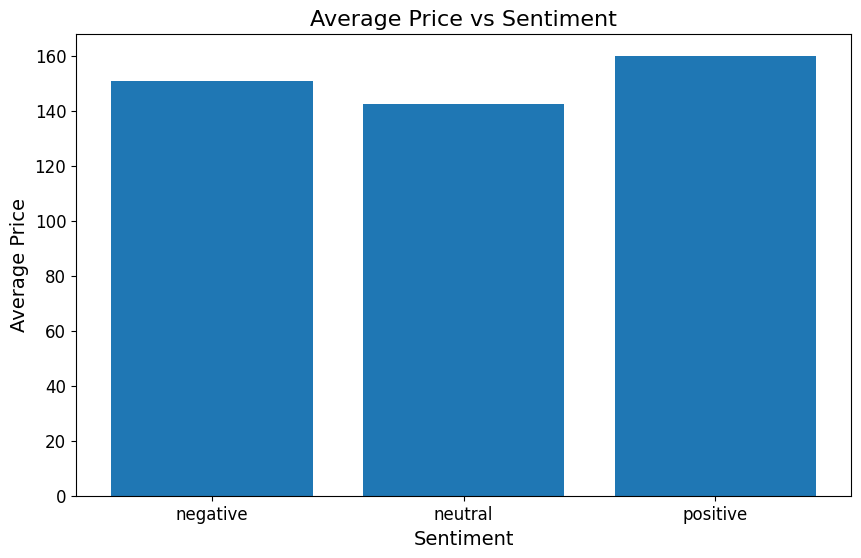

In [ ]:
import matplotlib.pyplot as plt

# Group data by sentiment and calculate average price
sentiment_price = austin_data.groupby('sentiment')['price_x'].mean().reset_index()

# Plot sentiment vs price
plt.figure(figsize=(10, 6))
plt.bar(sentiment_price['sentiment'], sentiment_price['price_x'])
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price vs Sentiment', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


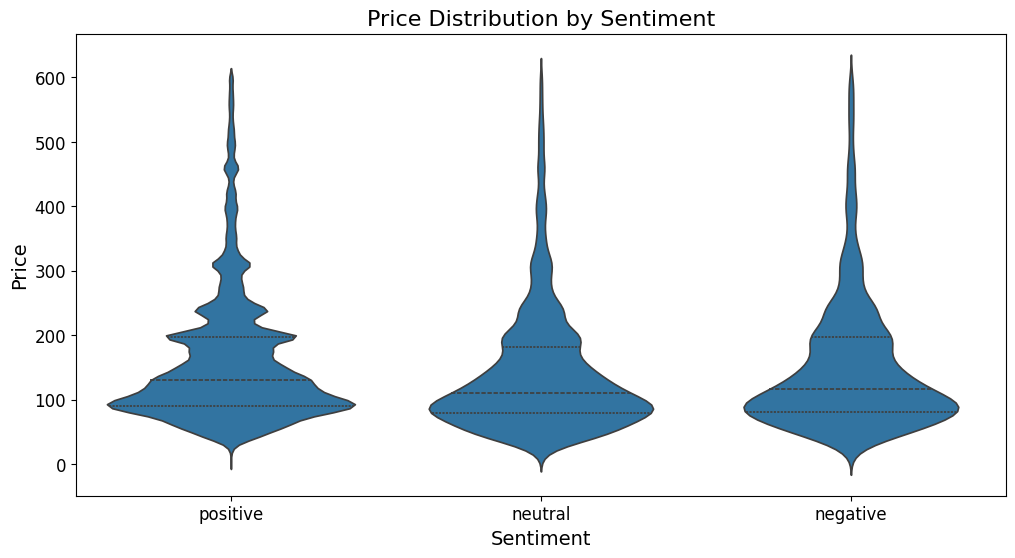

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='sentiment', y='price_x', data=austin_data, inner='quartile')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price Distribution by Sentiment', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# Take the first 20 rows of austin_data
#sample_austin_data = austin_data.head(20)

# Save the sample data to a CSV file
#file_path = "sample_austin_data.csv"
#sample_austin_data.to_csv(file_path, index=False)

#print(f"Sample data saved as '{file_path}'. You can now upload this file.")


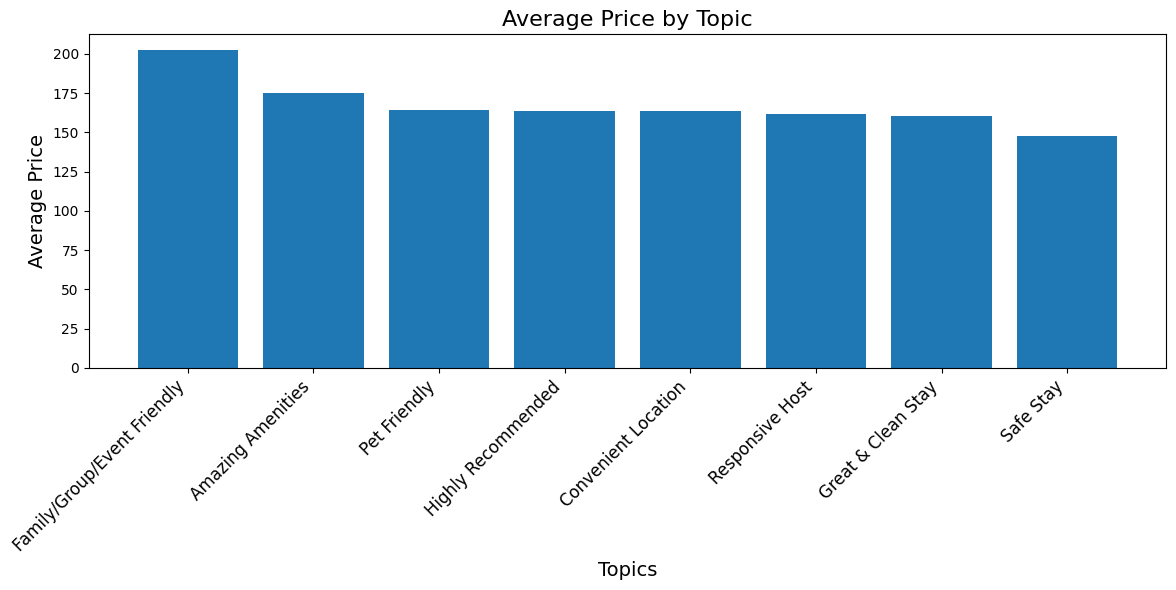

In [ ]:
import matplotlib.pyplot as plt

# Explode the topics column to analyze each topic individually
austin_data_exploded = austin_data.explode('topics')

# Group by topics and calculate the average price
topic_price = austin_data_exploded.groupby('topics')['price_x'].mean().reset_index()

# Sort topics by price
topic_price = topic_price.sort_values(by='price_x', ascending=False)

# Plot Price vs. Topic
plt.figure(figsize=(12, 6))
plt.bar(topic_price['topics'], topic_price['price_x'])
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price by Topic', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


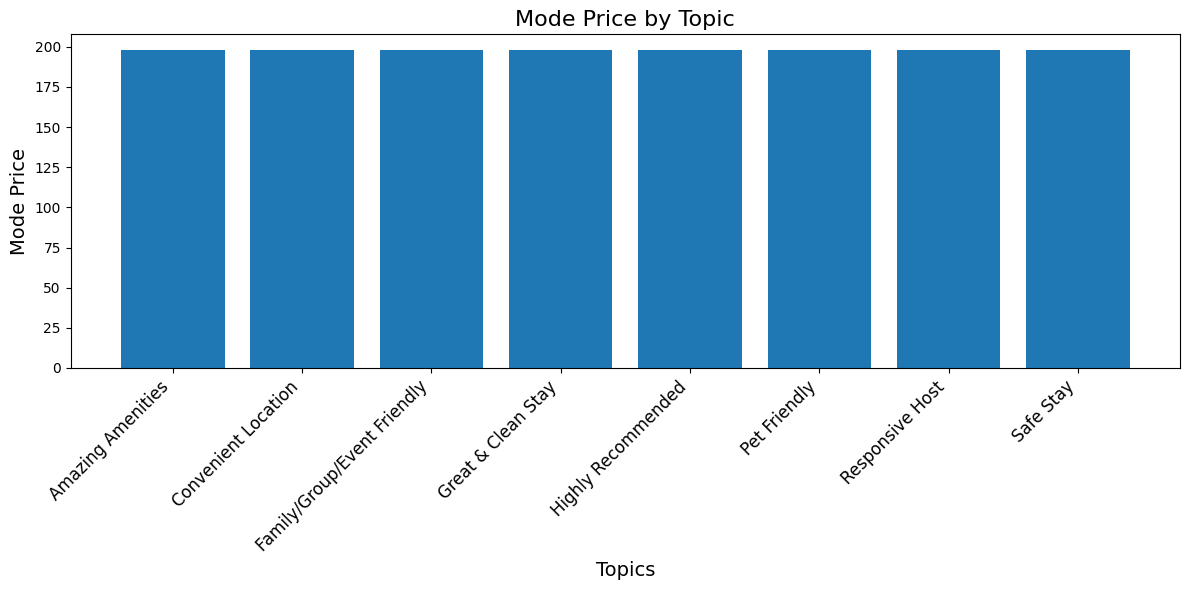

In [ ]:
# Explode the topics column
austin_data_exploded = austin_data.explode('topics')

# Group by topics and calculate mode of the price
def calculate_mode(series):
    return series.mode().iloc[0]  # Mode may return multiple values, pick the first

topic_price_mode = austin_data_exploded.groupby('topics')['price'].apply(calculate_mode).reset_index()

# Sort topics by mode price
topic_price_mode = topic_price_mode.sort_values(by='price', ascending=False)

# Plot Price (Mode) vs. Topic
plt.figure(figsize=(12, 6))
plt.bar(topic_price_mode['topics'], topic_price_mode['price'])
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Mode Price', fontsize=14)
plt.title('Mode Price by Topic', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


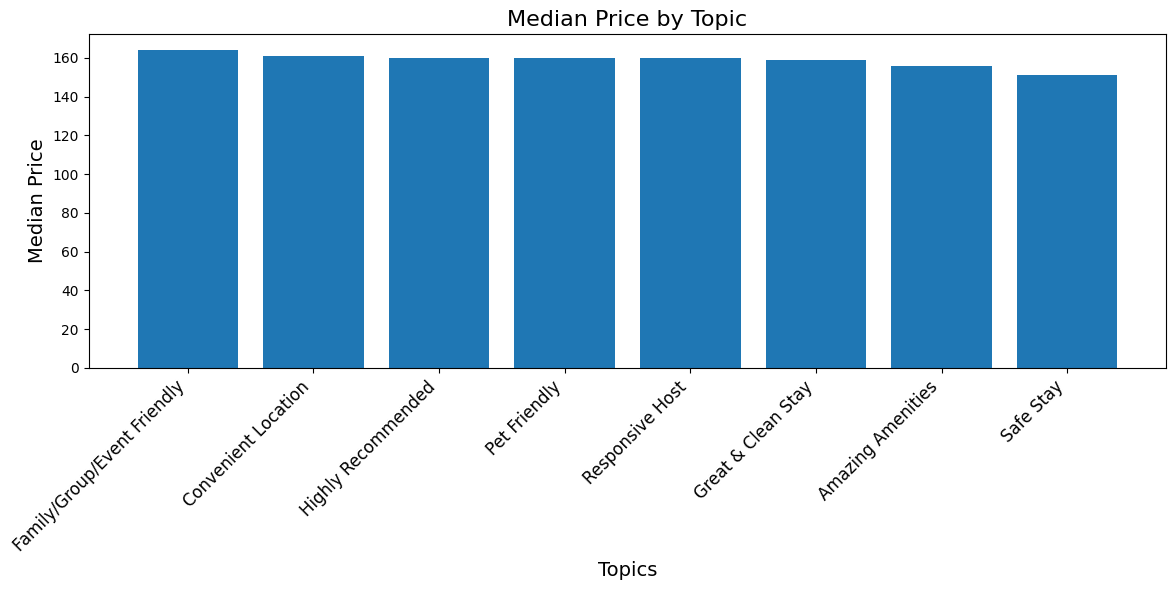

In [ ]:
import matplotlib.pyplot as plt

# Explode the topics column to separate multiple topics into individual rows
austin_data_exploded = austin_data.explode('topics')

# Group by listing_id and topics to avoid duplicates, then calculate the median price
listing_topic_price = austin_data_exploded.groupby(['listing_id', 'topics'])['price_x'].median().reset_index()

# Group by topics again to calculate the median price per topic
topic_price_median = listing_topic_price.groupby('topics')['price_x'].median().reset_index()

# Sort topics by median price
topic_price_median = topic_price_median.sort_values(by='price_x', ascending=False)

# Plot Median Price vs. Topic
plt.figure(figsize=(12, 6))
plt.bar(topic_price_median['topics'], topic_price_median['price_x'])
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.title('Median Price by Topic', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


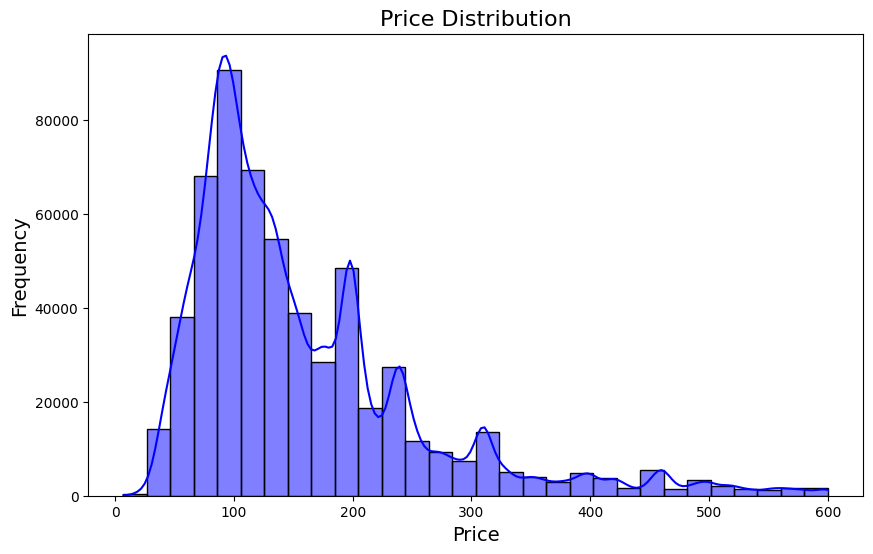

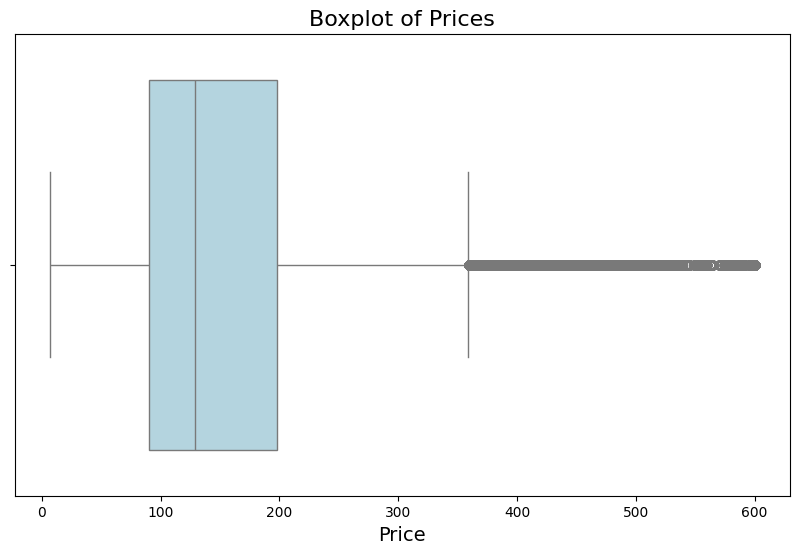

C:\Users\vanis\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


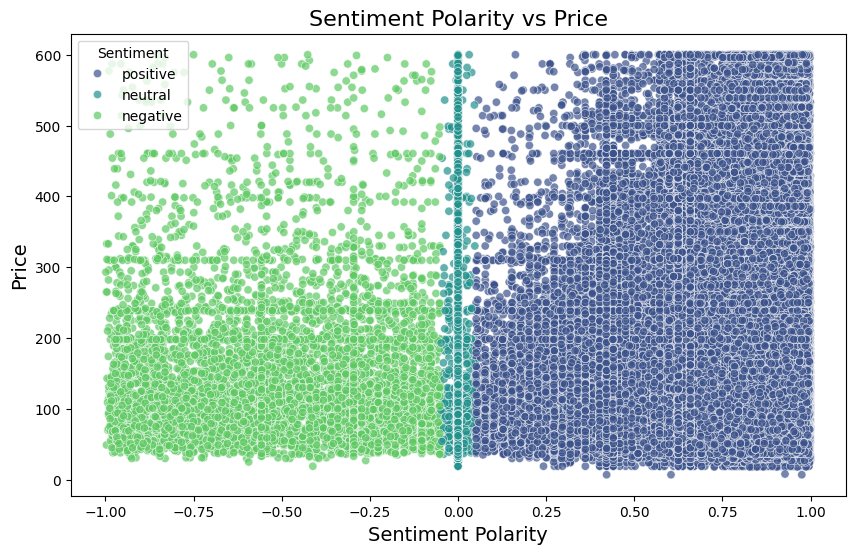

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(austin_data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Boxplot for price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=austin_data['price'], color='lightblue')
plt.title('Boxplot of Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.show()

# Scatterplot of sentiment polarity vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=austin_data, x='polarity', y='price', hue='sentiment', palette='viridis', alpha=0.7)
plt.title('Sentiment Polarity vs Price', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Sentiment')
plt.show()


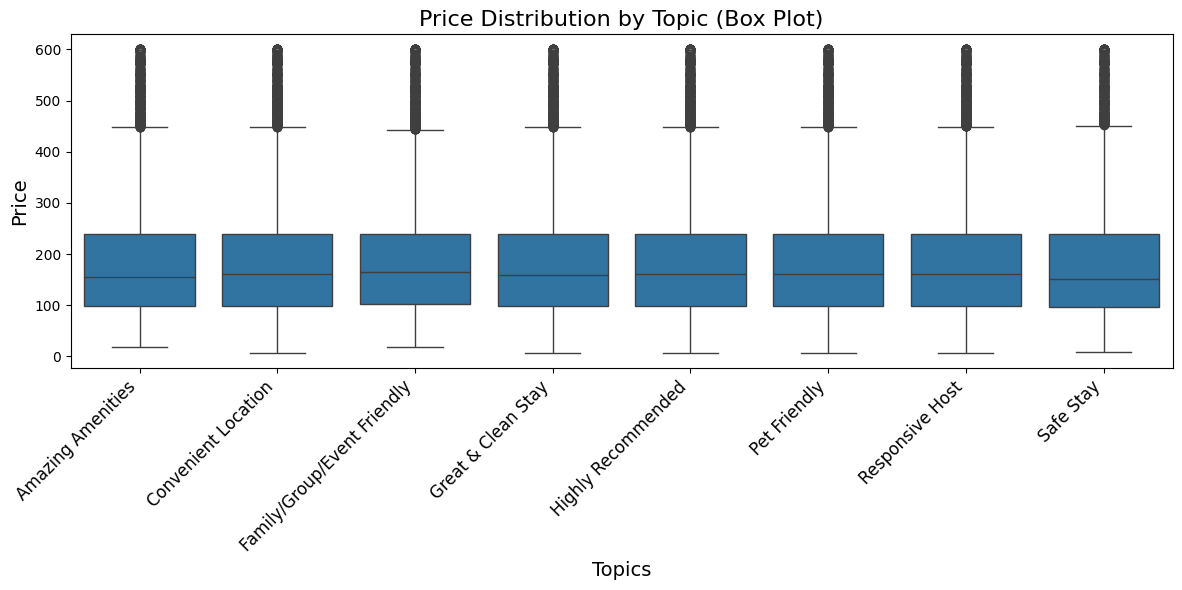

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the topics column to separate multiple topics into individual rows
austin_data_exploded = austin_data.explode('topics')

# Aggregate prices at the listing level to avoid duplicates
listing_topic_price = austin_data_exploded.groupby(['listing_id', 'topics'])['price_x'].median().reset_index()

# Create a box plot for price distribution across topics
plt.figure(figsize=(12, 6))
sns.boxplot(x='topics', y='price_x', data=listing_topic_price)
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price Distribution by Topic (Box Plot)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


##PRICE , REVIEW SCORE and TOPICS


In [ ]:
# Aggregate data by unique listing IDs to avoid duplication
unique_listings = austin_data.groupby('listing_id').agg(
    price=('price_x', 'mean'),  # Average price per unique listing
    review_score=('review_scores_rating_x', 'mean'),  # Average review score per unique listing
    topic=('topic', 'first')  # Assign the first topic for simplicity
).reset_index()

# Group by topic to calculate the final averages
topic_analysis_corrected = unique_listings.groupby('topic').agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    avg_review_score=('review_score', 'mean'),
    median_review_score=('review_score', 'median'),
    count=('listing_id', 'count')  # Count unique listings per topic
).reset_index()

# Display the corrected analysis
print(topic_analysis_corrected)


                         topic   avg_price  median_price  avg_review_score  \
0            Amazing Amenities  172.758926         150.0          4.633830   
1          Convenient Location  194.090331         183.0          4.831648   
2  Family/Group/Event Friendly  242.934478         232.5          4.816339   
3           Great & Clean Stay  179.353068         154.0          4.842355   
4           Highly Recommended  177.310818         149.5          4.857539   
5                 Pet Friendly  188.282510         177.5          4.853824   
6              Responsive Host  184.333928         163.0          4.852269   
7                    Safe Stay  152.098302         120.5          4.855268   
8                Uncategorized  162.601269         130.0          4.787939   

   median_review_score  count  
0                4.810    106  
1                4.920   2807  
2                4.940    129  
3                4.930   1051  
4                4.930    436  
5                4.955     

C:\Users\vanis\AppData\Local\Temp\ipykernel_32152\108311582.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(topic_analysis_corrected['topic'], rotation=45, ha='right')


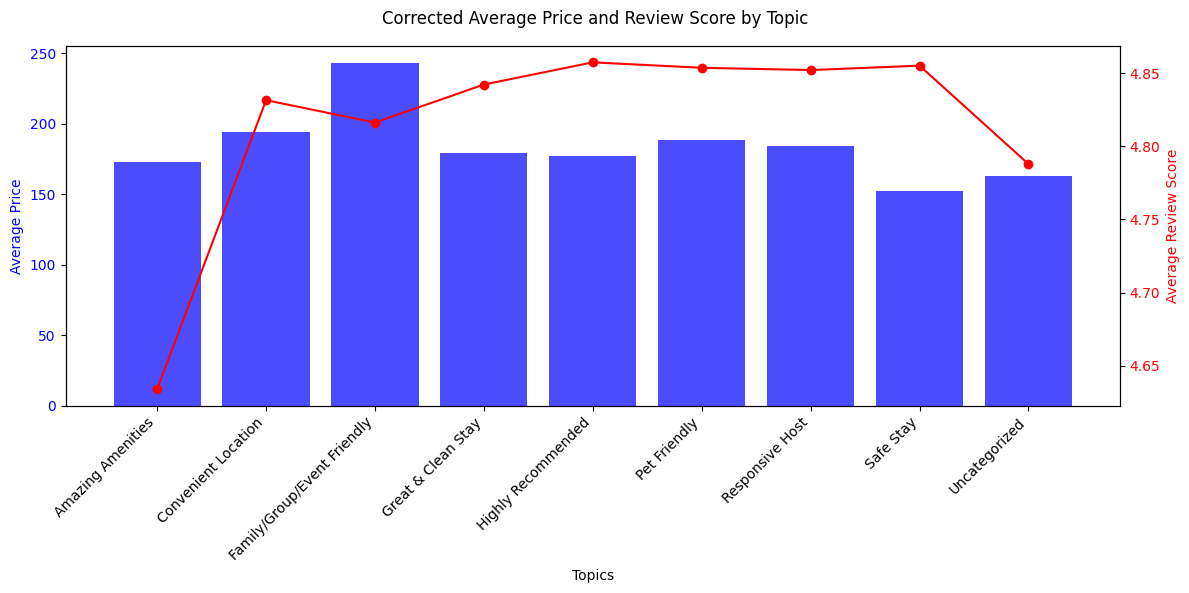

In [ ]:
import matplotlib.pyplot as plt

# Plot Average Price and Average Review Scores by Topic (Corrected)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average price
ax1.bar(topic_analysis_corrected['topic'], topic_analysis_corrected['avg_price'], alpha=0.7, label='Average Price', color='blue')
ax1.set_xlabel('Topics')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(topic_analysis_corrected['topic'], rotation=45, ha='right')

# Line plot for average review scores on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(topic_analysis_corrected['topic'], topic_analysis_corrected['avg_review_score'], color='red', marker='o', label='Average Review Score')
ax2.set_ylabel('Average Review Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Corrected Average Price and Review Score by Topic')
fig.tight_layout()
plt.show()
